## Notebook Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report ,accuracy_score, mean_squared_error , r2_score , roc_auc_score
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier , export_graphviz
import pydotplus as pdot
from IPython.display import Image
from sklearn.externals.six import StringIO  

C:\Users\NIKHIL\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
bill_data = pd.read_csv('bill_authentication.csv')
bill_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [15]:
bill_data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
X = sm.add_constant(bill_data.drop(['Class'],axis=1))
Y = bill_data.Class

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X,Y,train_size=0.8,random_state = 42)

In [5]:
classifier_tree = DecisionTreeClassifier(criterion='gini' , max_depth=3)
classifier_tree.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

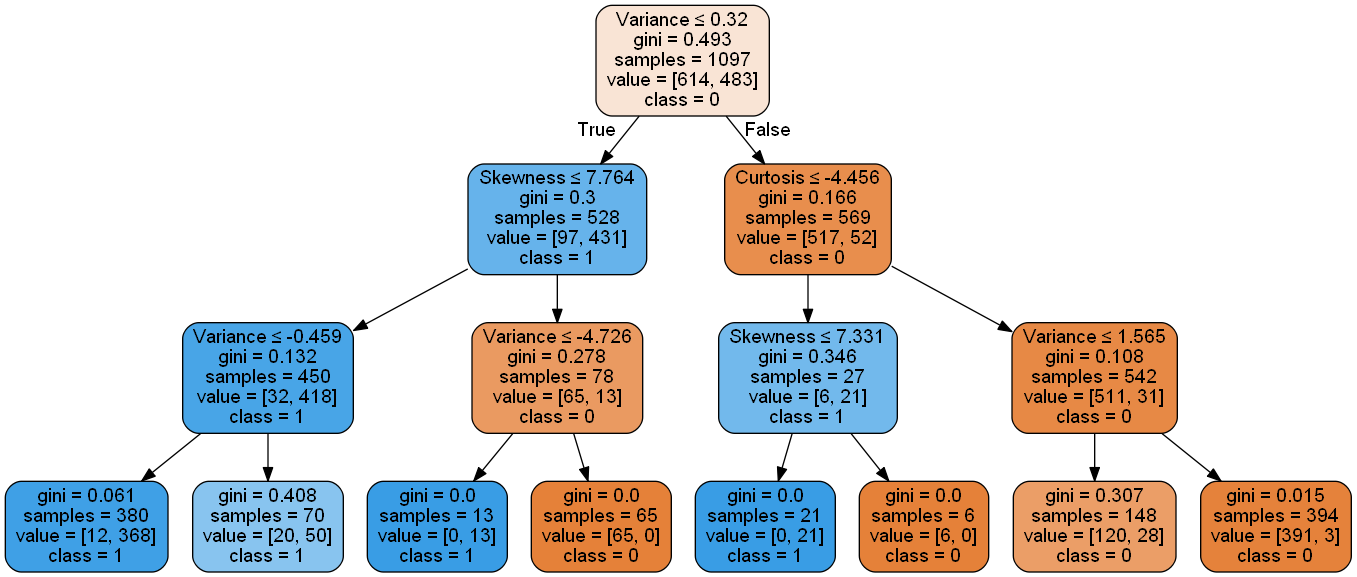

In [8]:
dot_data = StringIO()
export_graphviz(classifier_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pdot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [9]:
# classifier = StringIO() 
# export_graphviz(classifier_tree , out_file=classifier,filled=True , rounded=True,
#                 special_characters=True, feature_names=X_train.columns,class_names=['0','1'])
# classifier_graph = pdot.graph_from_dot_data(classifier.getvalue())
# Image(classifier_graph.create_png())

### Evaluation

In [6]:
tree_predict = classifier_tree.predict(X_test)

In [7]:
roc_auc_score(y_test , tree_predict)

0.9066024686103425

In [10]:
print(classification_report(y_test , tree_predict))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       148
           1       0.93      0.87      0.90       127

    accuracy                           0.91       275
   macro avg       0.91      0.91      0.91       275
weighted avg       0.91      0.91      0.91       275



In [11]:
np.round(accuracy_score(y_test,tree_predict),2)

0.91

In [12]:
r2_score(y_test , tree_predict)

0.6342306873802936

In [13]:
gini_node = 1 - pow(614/1097 , 2) - pow(483/1097 , 2)
np.round(gini_node,3)

0.493

In [14]:
np.sqrt(mean_squared_error(y_test,tree_predict))

0.30151134457776363